In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Fetching the datset from the Google Drive
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Churn_Modelling (1).csv")
# Displaying the sample of the dataset
df=pd.DataFrame(data)
print("The sample of the Churn Modelling dataset is:")
df.head()

The sample of the Churn Modelling dataset is:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print("The shape of the dataset is:")
df.shape

The shape of the dataset is:


(10000, 14)

In [7]:
print("The information regarding the dataset is:\n")
df.info()

The information regarding the dataset is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
# Converting the categorical data into numerical data using Label Encoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])
print("The datset after encoding Geography and Gender is:")
df.head()

The datset after encoding Geography and Gender is:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Dropping the unnecessary columns for better classification
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Seperating the feature attributes and the target attribute fron the dataset
y = df.Exited.values
X = df.drop(['Exited'], axis=1)
# Describing the datset to see the maximum values, minimum values, mean values ...
X.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [11]:
# Using min-max normalization on the dataset
X = (X - np.min(X)) / (np.max(X)-np.min(X))
print("The datset after normalizing is:")
X.head()

The datset after normalizing is:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [12]:
# Splitting the data for training (80%) and testing data (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_train shape:  (8000, 10)
y_train shape:  (8000,)
X_test shape:  (2000, 10)
y_test shape:  (2000,)


**Logistic Regression Model**

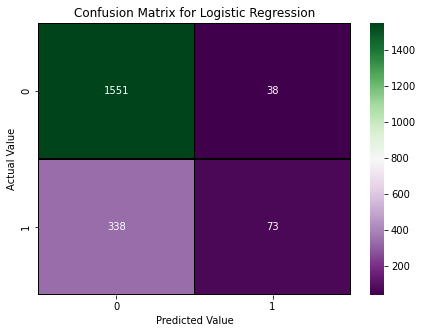


The classification report for Logistic Regression is:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1589
           1       0.66      0.18      0.28       411

    accuracy                           0.81      2000
   macro avg       0.74      0.58      0.59      2000
weighted avg       0.79      0.81      0.77      2000


Accuracy of the Logistic Regression model is:  0.812


In [16]:
# Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
# Initializing the Logistic Regression model
lr = LogisticRegression()
# Training the Logistic Regression model
lr.fit(X_train, y_train)
# Predicting target values by using X_test and our model
y_pred0 = lr.predict(X_test)
# Creating the confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, y_pred0)
# Plotting the confusion matrix and printing the classification report
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.8, linecolor='black', fmt='.0f', ax=ax, cmap='PRGn')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print("\nThe classification report for Logistic Regression is:\n")
print(classification_report(y_test,y_pred0))
# Calculating accuracy of the Logistic Regression model
print("\nAccuracy of the Logistic Regression model is: ", metrics.accuracy_score(y_test, y_pred0))

**Decision Tree Model**

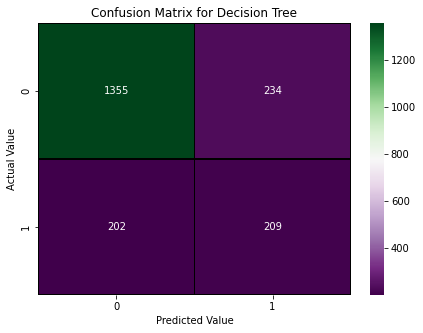


The classification report for Decision Tree is:

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1589
           1       0.47      0.51      0.49       411

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.78      0.78      2000


Accuracy of the Decision Tree model is:  0.782


In [17]:
# Importing Tree from sklearn
from sklearn import tree
# Initializing the Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
# Training the Decision Tree model
clf.fit(X_train,y_train)
# Predicting target values by using X_test and our model
y_pred1=clf.predict(X_test)
# Creating the confusion matrix for Decision Tree
dt_cm = confusion_matrix(y_test, y_pred1)
# Plotting the confusion matrix and printing the classification report
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.8, linecolor='black', fmt='.0f', ax=ax, cmap='PRGn')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print("\nThe classification report for Decision Tree is:\n")
print(classification_report(y_test,y_pred1))
# Calculating accuracy of the Decision Tree
print("\nAccuracy of the Decision Tree model is: ", metrics.accuracy_score(y_test, y_pred1))


**Random Forest Model**

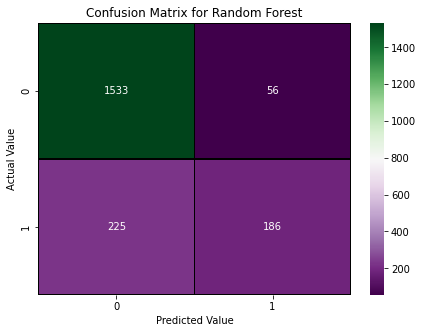


The classification report for Random Forest is:

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1589
           1       0.77      0.45      0.57       411

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000


Accuracy of the Random Forest model is:  0.8595


In [18]:
# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest model using 200 trees
clf=RandomForestClassifier(n_estimators=200)
# Training the Random Forest model
clf.fit(X_train,y_train)
# Predicting target values by using X_test and our model
y_pred2=clf.predict(X_test)
# Creating the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, y_pred2)
# Plotting the confusion matrix and printing the classification report
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.8, linecolor='black', fmt='.0f', ax=ax, cmap='PRGn')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print("\nThe classification report for Random Forest is:\n")
print(classification_report(y_test,y_pred2))
# Calculating accuracy the Random Forest of the model
print("\nAccuracy of the Random Forest model is: ", metrics.accuracy_score(y_test, y_pred2))

**K-Nearest Neighbours Model**

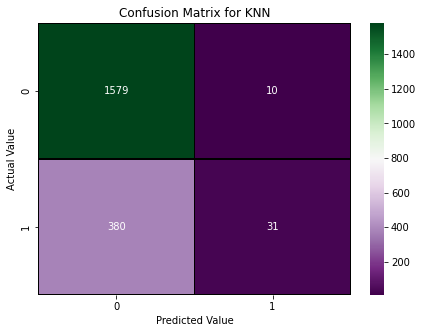


The classification report for KNN is:

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1589
           1       0.76      0.08      0.14       411

    accuracy                           0.81      2000
   macro avg       0.78      0.53      0.51      2000
weighted avg       0.80      0.81      0.74      2000


Accuracy of the model for KNN is:  0.805


In [19]:
# Importing KNN Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Initializing the KNN model using 51 neighbours
knn = KNeighborsClassifier(n_neighbors=51)
# Training the KNN model
knn.fit(X_train, y_train)
# Predicting target values by using X_test and our model
y_pred3=knn.predict(X_test)
# Creating the confusion matrix for KNN
knn_cm = confusion_matrix(y_test, y_pred3)
# Plotting the confusion matrix and printing the classification report
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.8, linecolor='black', fmt='.0f', ax=ax, cmap='PRGn')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print("\nThe classification report for KNN is:\n")
print(classification_report(y_test,y_pred3))
# Calculating accuracy of the KNN model
print("\nAccuracy of the model for KNN is: ", metrics.accuracy_score(y_test, y_pred3))

**Support Vector Machine Model**

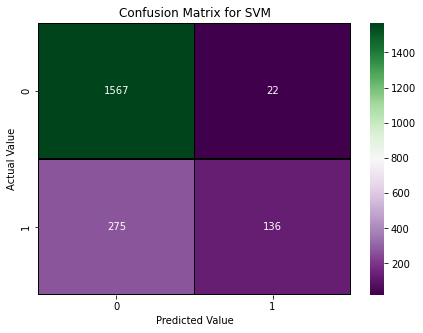


The classification report for SVM is:

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1589
           1       0.86      0.33      0.48       411

    accuracy                           0.85      2000
   macro avg       0.86      0.66      0.70      2000
weighted avg       0.85      0.85      0.82      2000


Accuracy of the model for SVM is:  0.8515


In [20]:
# Importing SVC from sklearn
from sklearn.svm import SVC
# Initializing the SVM model using rbf kernel
svclassifier = SVC(kernel='rbf')
# Training the SVM model
svclassifier.fit(X_train, y_train)
# Predicting target values by using X_test and our model
y_pred4=svclassifier.predict(X_test)
# Creating the confusion matrix for SVM
svm_cm = confusion_matrix(y_test, y_pred4)
# Plotting the confusion matrix and printing the classification report
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(svm_cm, annot=True, linewidth=0.8, linecolor='black', fmt='.0f', ax=ax, cmap='PRGn')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print("\nThe classification report for SVM is:\n")
print(classification_report(y_test,y_pred4))
# Calculating accuracy of the SVM model
print("\nAccuracy of the model for SVM is: ", metrics.accuracy_score(y_test, y_pred4))

**Naïve Bayesian Model**

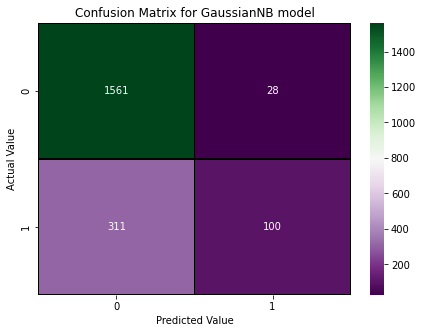


The classification report for GaussianNB model is:

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1589
           1       0.78      0.24      0.37       411

    accuracy                           0.83      2000
   macro avg       0.81      0.61      0.64      2000
weighted avg       0.82      0.83      0.79      2000


Accuracy of the model for GaussianNB is:  0.8305


In [21]:
# Importing GaussianNB from sklearn
from sklearn.naive_bayes import GaussianNB
# Initializing a GaussianNB Classifier
gnb = GaussianNB()
# Training the GaussianNB model
gnb.fit(X_train, y_train)
# Predicting target values by using X_test and our model
y_pred5 = gnb.predict(X_test)
# Creating the confusion matrix for GaussianNB Model
nb_cm = confusion_matrix(y_test, y_pred5)
# Plotting the confusion matrix and printing the classification report
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.8, linecolor='black', fmt='.0f', ax=ax, cmap='PRGn')
plt.title('Confusion Matrix for GaussianNB model')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()
print("\nThe classification report for GaussianNB model is:\n")
print(classification_report(y_test,y_pred5))
# Calculating accuracy of the Gaussian model
print("\nAccuracy of the model for GaussianNB is: ", metrics.accuracy_score(y_test, y_pred5))

**Artificial Neural Network Model**

In [22]:
# Importing the Sequential Model and Dense Layer from keras
from keras.models import Sequential
from keras.layers import Dense
# Initializing the Sequential model
model = Sequential()
# Adding the Dense Layers to the model
model.add(Dense(8,activation = 'relu', input_dim=10))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
# Compiling the ANN model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
X_train1=np.asarray(X_train.values).astype(np.int)
y_train1=np.asarray(y_train).astype(np.int)
# Fitting the model on the training data
print("Training the ANN model:\n")
model.fit(X_train1,y_train1, epochs = 10, batch_size = 5)


Training the ANN model:

Epoch 1/10
1600/1600 [==============================] - 3s 1ms/step - loss: 0.4966 - accuracy: 0.7961
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4812 - accuracy: 0.8018
Epoch 3/10
1600/1600 [==============================] - 2s 2ms/step - loss: 0.4787 - accuracy: 0.8030
Epoch 4/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4781 - accuracy: 0.8030
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4775 - accuracy: 0.8030
Epoch 6/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4772 - accuracy: 0.8030
Epoch 7/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4772 - accuracy: 0.8030
Epoch 8/10
1600/1600 [==============================] - 4s 2ms/step - loss: 0.4770 - accuracy: 0.8031
Epoch 9/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4770 - accuracy: 0.8030
Epoch 10/10
1600/1600 [==============================] - 

In [23]:
# Evaluating the accuracy of the model on testing data
X_test1=np.asarray(X_test).astype(np.int)
y_test1=np.asarray(y_test).astype(np.int)
accuracy=model.evaluate(X_test1,y_test1)
print("\nAccuracy for this ANN model is: ",accuracy[1]*100)

63/63 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7995

Accuracy for this ANN model is:  79.94999885559082


In [25]:
# Constructing the accuracy dictionary for further analysis
accuracy_dict=dict()
accuracy_dict['Logistic Regression']= round(metrics.accuracy_score(y_test, y_pred0)*100,3)
accuracy_dict['Decision Tree']= round(metrics.accuracy_score(y_test, y_pred1)*100,3)
accuracy_dict['Random Forest']= round(metrics.accuracy_score(y_test, y_pred2)*100,3)
accuracy_dict['KNN']=round(metrics.accuracy_score(y_test, y_pred3)*100,3)
accuracy_dict['SVM']= round(metrics.accuracy_score(y_test, y_pred4)*100,3)
accuracy_dict['Naïve Bayes']= round(metrics.accuracy_score(y_test, y_pred5)*100,3)
accuracy_dict['ANN']= round(accuracy[1]*100,3)
# Sorting the dictionary according to the accuracies
accuracy_dict=dict(sorted(accuracy_dict.items(),key=lambda item: item[1],reverse=True))
# Converting the dictionary into dataframe
accuracy_df = pd.DataFrame(list(accuracy_dict.items()),columns = ['Model Used', 'Accuracy of the Model'])
print("The models used along with the accuracies is as follows: \n")
accuracy_df

The models used along with the accuracies is as follows: 



,Model Used,Accuracy of the Model
0,Random Forest,85.95
1,SVM,85.15
2,Naïve Bayes,83.05
3,Logistic Regression,81.20
4,KNN,80.50
5,ANN,79.95
6,Decision Tree,78.20


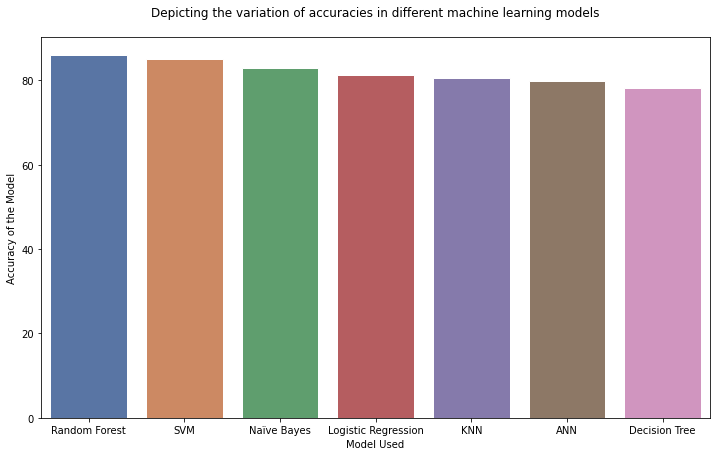

In [26]:
# Plotting the different accuracy scores with the models used for visualization
f, ax = plt.subplots(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.barplot(y="Accuracy of the Model", x="Model Used", data = accuracy_df)
plt.title("Depicting the variation of accuracies in different machine learning models\n")
plt.show()

From the above plot, we can conclude that Random Forest Model gives the most accuracy of 85.75% then
comes the SVM Model with an accuracy of 85.15% which was also very near to the accuracy achieved by
the Random Forest Model. Then comes the Naïve Bayesian Model giving us an accuracy of 83.05%. The
least accuracies are given by the Decision Tree Model i.e 78.10% and the Artificial Neural Network Model
i.e 79.05%.